In [2]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [4]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()
(img_h,img_w)=xtrain[0].shape
print("Img is ",img_h," x ",img_w)
xtrain=xtrain/255
xtest=xtest/255

Img is  28  x  28


In [5]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=11)

Epoch 1/11
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6500 - accuracy: 0.8355 - val_loss: 0.3557 - val_accuracy: 0.9037
Epoch 2/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3337 - accuracy: 0.9070 - val_loss: 0.2944 - val_accuracy: 0.9171
Epoch 3/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2854 - accuracy: 0.9199 - val_loss: 0.2614 - val_accuracy: 0.9269
Epoch 4/11
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2565 - accuracy: 0.9279 - val_loss: 0.2409 - val_accuracy: 0.9326
Epoch 5/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2348 - accuracy: 0.9345 - val_loss: 0.2225 - val_accuracy: 0.9374
Epoch 6/11
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2170 - accuracy: 0.9392 - val_loss: 0.2078 - val_accuracy: 0.9413
Epoch 7/11
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2021 - accuracy: 0.9438 - val_loss: 0.1982 - val_acc

In [7]:
(x_loss,x_acc)=model.evaluate(xtest,ytest)
print("Loss %.3f"%x_loss)
print("Accuracy %.3f"%x_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1619 - accuracy: 0.9541
Loss 0.162
Accuracy 0.954


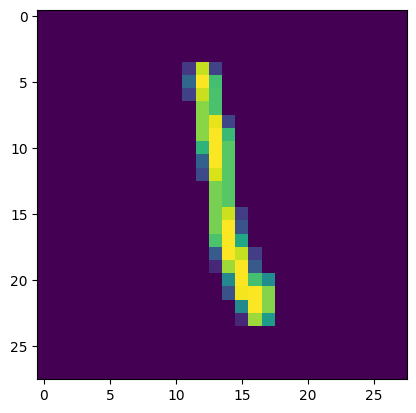

In [8]:
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()

In [10]:
predicted=model.predict(xtest)
import numpy as np
print("Actual ",ytest[n])
print("Predicted ",np.argmax(predicted[n]))

313/313 [==============================] - 1s 4ms/step
Actual  1
Predicted  1


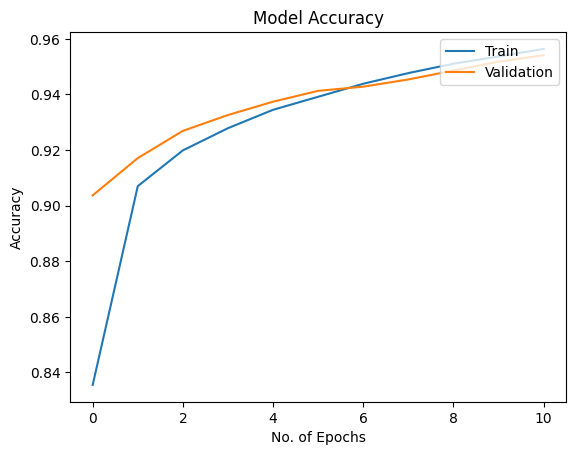

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()

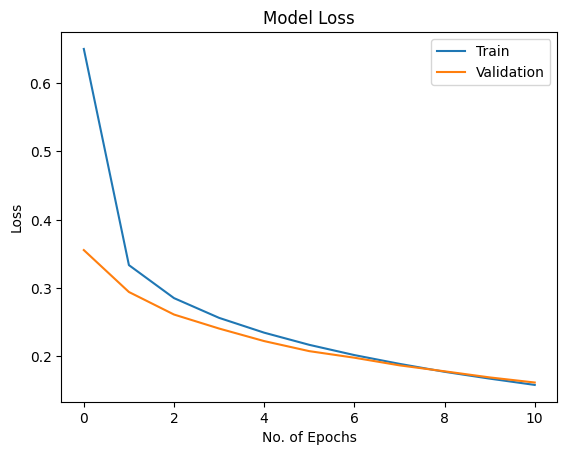

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()